In [1]:
import matplotlib.pyplot as plt
import tweepy
import re
import sys,csv
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import string

Enter Keyword/Tag to search about: python
Enter how many tweets to search: 10
How people are reacting on python by analyzing 10 tweets.

General Report: 
Weakly Positive

Detailed Report: 
10.00% people thought it was positive
10.00% people thought it was weakly positive
0.00% people thought it was strongly positive
0.00% people thought it was negative
10.00% people thought it was weakly negative
0.00% people thought it was strongly negative
70.00% people thought it was neutral


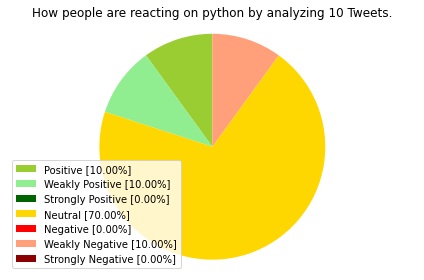

In [2]:
from textblob import TextBlob

class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating
        consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
        consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
        accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
        accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)

        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword/Tag to search about: ")
        NoOfTerms = int(input("Enter how many tweets to search: "))

        # searching for tweets
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

        # Open/create a file to append data to
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating some variables to store info
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0


        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()



if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#!pip install nltk.sentiment.vader
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

consumerKey = 'jzn0NU9EviCRRbONbUXX9a8VN'
consumerSecret = 'ULsKu9BjBPmZ3yY5NdS6EXUhGBNWKUWxtwKqFktBeqsOq1Y3ZQ'
accessToken = '781482721-6928Gtnj95bK82PW3fYDxHFvU5T4l3SPI4VVF1X2'
accessTokenSecret = 'fTxclLJ4oxEmqshRhSbBibGoUiNq1l6941C0VyREdTf41'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: python
Please enter how many tweets to analyze: 20


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  20
positive number:  11
negative number:  2
neutral number:  7


In [5]:
tweet_list

,0
0,RT @Python4Fun: Python for 3D Printing (#Kindl...
1,RT @academ_writer2: To get help in:\n#Math hw\...
2,RT @TaofeeqOtu: Day 50 of #100DaysOfCode \nYee...
3,RT @IainLJBrown: Using A.I. to Find Bias in A....
4,RT @Yann_LeGall: gyrated hexagonal tiling.\n#b...
5,RT @dannysteenman: Here is a useful Github rep...
6,RT @TaofeeqOtu: Day 50 of #100DaysOfCode \nYee...
7,RT @TaofeeqOtu: Day 50 of #100DaysOfCode \nYee...
8,@injuryexpert If you’re counting sketch comedy...
9,RT @oneleggoalie: #indiegames #indiedev #Indie...


In [6]:

tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Python4Fun: Python for 3D Printing (#Kindl...,python for 3d printing kindle using pyth...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @academ_writer2: To get help in:\n#Math hw\...,to get help in math hw excel project pay ...,-0.062500,0.187500,positive,0.107,0.573,0.321,0.7650
2,RT @TaofeeqOtu: Day 50 of #100DaysOfCode \nYee...,day 50 of 100daysofcode yeeeehhh i m ha...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @IainLJBrown: Using A.I. to Find Bias in A....,using a i to find bias in a i the new yor...,0.318182,0.477273,negative,0.076,0.924,0.000,-0.1027
4,RT @Yann_LeGall: gyrated hexagonal tiling.\n#b...,gyrated hexagonal tiling blender python g...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @dannysteenman: Here is a useful Github rep...,here is a useful github repo that allows you ...,0.437500,0.250000,positive,0.000,0.784,0.216,0.7003
6,RT @TaofeeqOtu: Day 50 of #100DaysOfCode \nYee...,day 50 of 100daysofcode yeeeehhh i m ha...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @TaofeeqOtu: Day 50 of #100DaysOfCode \nYee...,day 50 of 100daysofcode yeeeehhh i m ha...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,@injuryexpert If you’re counting sketch comedy...,if you re counting sketch comedy python had...,0.000000,0.000000,positive,0.000,0.783,0.217,0.3612
9,RT @oneleggoalie: #indiegames #indiedev #Indie...,indiegames indiedev indiegamedev indiemus...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [7]:
!pip install wordcloud
!pip install stopwords
!pip install image

You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\black\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [9]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        df.to_csv("TweetDataset.csv",index=False)
        #df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

In [10]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
Topic= input("Enter keyword/hashtag to search for data: ")
get_tweets(Topic , Count=100)

Enter keyword/hashtag to search for data: python


In [11]:
df.head(8)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-07-22 22:47:28,jrt1201a,False,SPLICE-q: a Python tool for genome-wide quanti...,0,0,austin texas
1,2021-07-22 22:47:06,Larry W,False,@injuryexpert If you’re counting sketch comedy...,0,0,
2,2021-07-22 22:46:59,Academic Writers,False,To get help in:\n#Math hw\n#excel\n#Project\nP...,1,2,New York | USA
3,2021-07-22 22:46:53,oneleggoalie,False,#indiegames #indiedev #IndieGameDev #indiemusi...,1,13,...down a rearview mirror...
4,2021-07-22 22:46:44,ACCOUNTING BUSINESS CALCULUS PRECAL STATS ECON,False,We do Online class\n#Sociology\n#Exams\n#Final...,1,4,"Miamitown, OH"
5,2021-07-22 22:46:26,Karim Oliver,False,"My skills include, python, excel, and timely p...",0,0,"Seattle, WA"
6,2021-07-22 22:46:11,oneleggoalie,False,@womenIdiaspora @femtech_ ...coz old men don't...,0,6,...down a rearview mirror...
7,2021-07-22 22:46:04,Stacy,False,Natural Language Processing (NLP) with Python ...,0,2,"Cambridge, MA"


In [12]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [13]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [19]:
tw = df.Tweet.loc[0]
print(tw)

SPLICE-q: a Python tool for genome-wide quantification of splicing efficiency https://t.co/rFtH64lblt


In [27]:
help(wordcloud.WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul

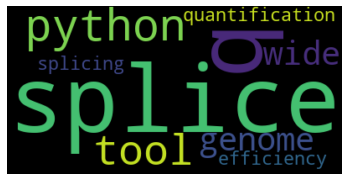

In [28]:
from wordcloud import WordCloud
# Start with one review:

text = clean_tweet(tw)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [33]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

FileNotFoundError: [Errno 2] No such file or directory: 'cloud.png'